# ***INSURANCE DATASET ANALYSIS AND LINEAR REGRESSION***
We are given a dataset which contains the information of different customers and the charges they pay for....Our task is to
* Analyse the given dataset 
* Draw conclusions from data
* Feature engineering
* Use Linear Regression to predict the prices
* Make a interactive console UI 

In [1]:
## Importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Importing the data
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We have 6 independent columns and one dependent column (charges)

In [3]:
## Getting the info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


It's good that there are no null values. Makes our job easier :)

## **DATA VISUALIZATION**

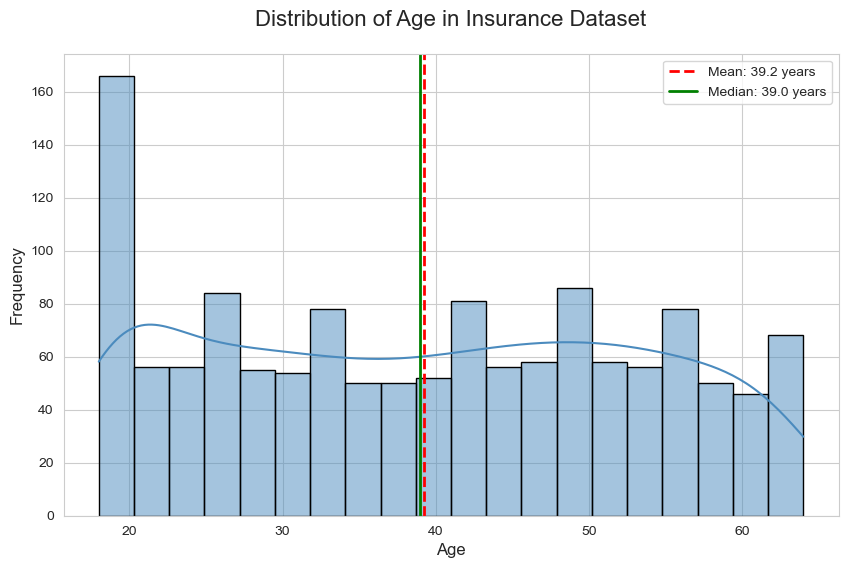

In [4]:
## lET'S FIRST ANALYSE THE AGE DATASET
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="age", bins=20, kde=True, color="#4B8BBE", edgecolor="black")
plt.title("Distribution of Age in Insurance Dataset", fontsize=16, pad=20)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

mean_age = np.mean(data['age'])
median_age = np.median(data['age'])
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {mean_age:.1f} years')
plt.axvline(median_age, color='green', linestyle='-', linewidth=2, 
            label=f'Median: {median_age:.1f} years')
plt.legend()

* We have a normally distributed and unskewed data. More numbers of 16-20
* The mean and median being almost same suggest this is central data

In [5]:
## Now let's move to see the sex column. It is categorical
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

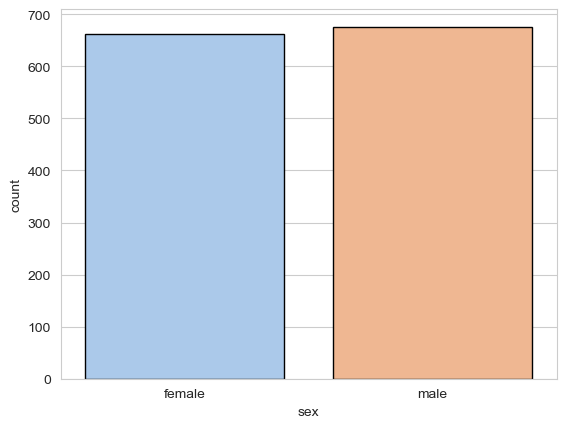

In [6]:
## PLOTTIN IT
sns.countplot(data=data, x='sex', palette="pastel", edgecolor="black")

* They are also nearly the same. It's good

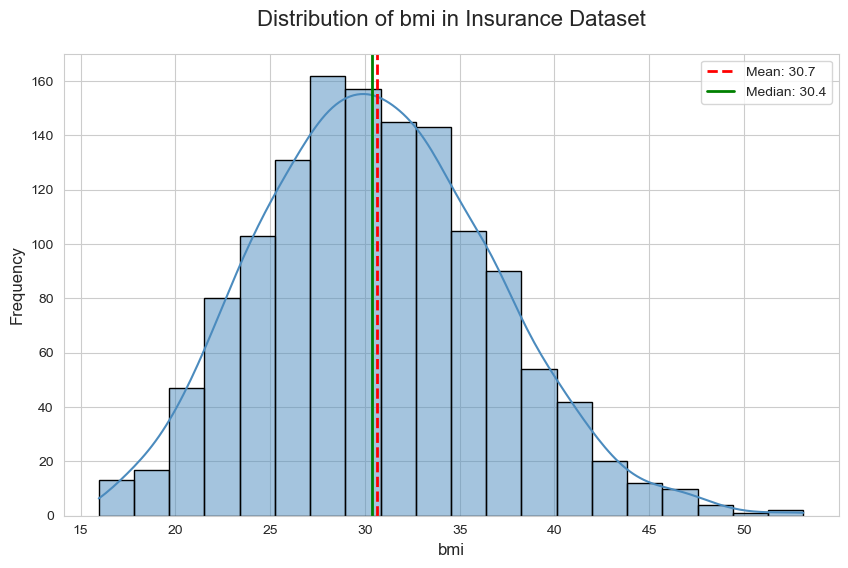

In [7]:
## let's dp the same for BMI
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="bmi", bins=20, kde=True, color="#4B8BBE", edgecolor="black")
plt.title("Distribution of bmi in Insurance Dataset", fontsize=16, pad=20)
plt.xlabel("bmi", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

mean_age = np.mean(data['bmi'])
median_age = np.median(data['bmi'])
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {mean_age:.1f}')
plt.axvline(median_age, color='green', linestyle='-', linewidth=2, 
            label=f'Median: {median_age:.1f}')
plt.legend()

* Most people have a bmi in range 20-40 which is good

Text(0.5, 1.0, 'AGE vs BMI BY GENDER')

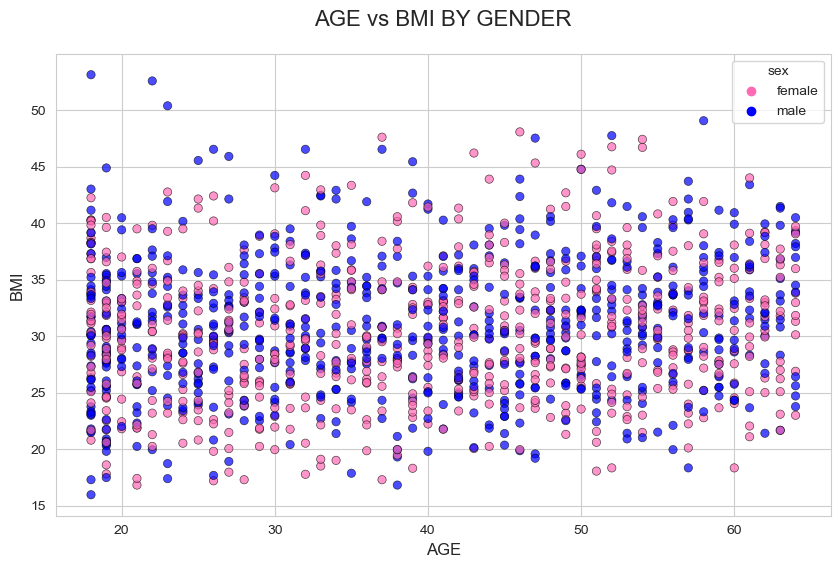

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data, 
    x='age', 
    y='bmi', 
    hue='sex',  # Color by gender
    palette={'male': 'blue', 'female': 'hotpink'},  # Custom colors
    alpha=0.7,  # Transparency
    edgecolor='black'  # Border for points
)

plt.xlabel('AGE', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.title('AGE vs BMI BY GENDER', fontsize=16, pad=20)

There is no such direct relation like bmi increase with age. There are all kinds of customer, Young and overweight customers and also old and underweight
*General Conclusion -* Age alone doesn’t predict BMI well. Other factors (genetics, lifestyle, diet) play a bigger role. 

<Axes: xlabel='smoker', ylabel='count'>

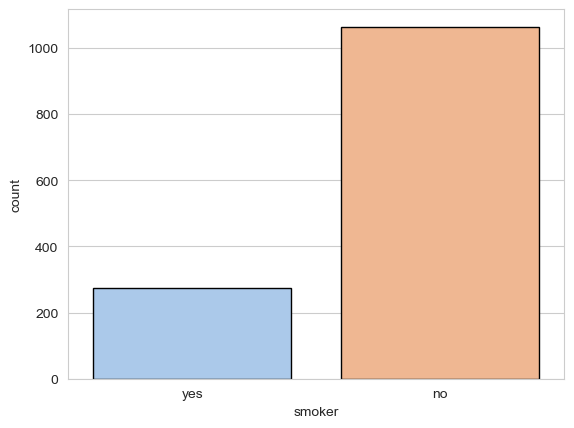

In [9]:
## visualising the smoker column
sns.countplot(data=data, x='smoker', palette="pastel", edgecolor="black")

Most of them are non smokers

<Axes: xlabel='smoker', ylabel='count'>

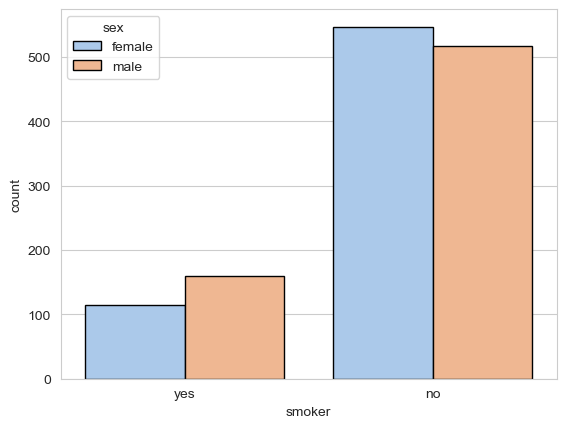

In [10]:
## relation with the sex
sns.countplot(data=data, x='smoker', hue='sex',palette="pastel", edgecolor="black")

More male smoke

In [11]:
## Now let's check the children column
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<Axes: ylabel='Frequency'>

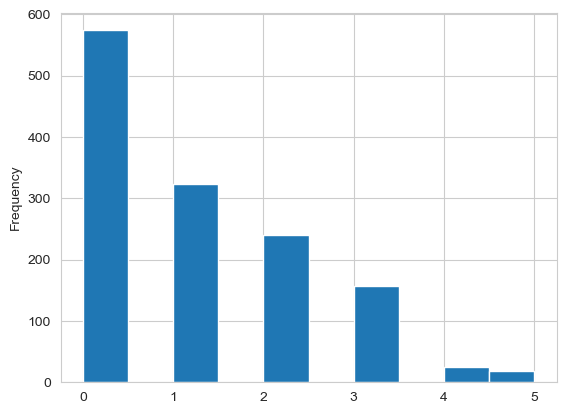

In [12]:
data['children'].plot(kind='hist')

* Most of the customers are childrenless
* This is also proven by the fact that number of 20 years is more than others 
* So quiet obvious

<Axes: xlabel='children', ylabel='count'>

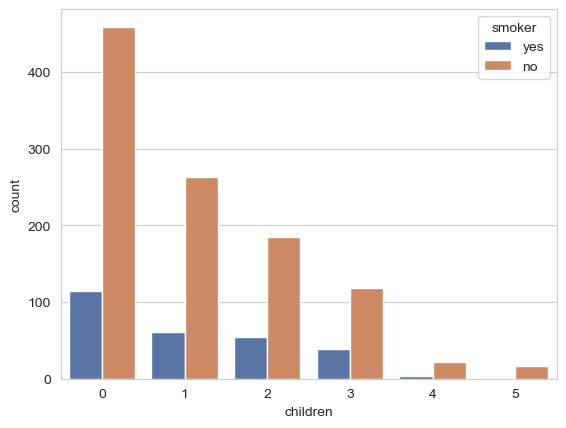

In [13]:
## Let's check a fun thing. How many parents, even after having children smoke!
sns.countplot(data=data, x='children', hue='smoker', palette='deep')

Yeah...not that concerning stats!

In [14]:
# Our final independent column - region
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [15]:
## It is also categorical value only
## Let's check some fun things

'''
1. Which area people have more children
2. Which are people smoke the most
3. Which are has the youngest people
'''

gp = data.groupby('region')
childCount = gp['children'].sum().head(1).index[0]
smokeCount = gp['smoker'].sum().head(1).index[0]
ageCount = gp['age'].sum().sort_values(ascending=True).head(1).index[0]
print(f"1. People in '{childCount}' have the most children.")
print(f"2. People in '{smokeCount}' smoke the most.")
print(f"3. '{ageCount}' has the youngest people on average.")

1. People in 'northeast' have the most children.
2. People in 'northeast' smoke the most.
3. 'northeast' has the youngest people on average.


So Northeast wins!

C:\Users\PROGRAMMER\AppData\Local\Temp\ipykernel_11136\2738576099.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.drop('region', axis=1).corr()


<Axes: >

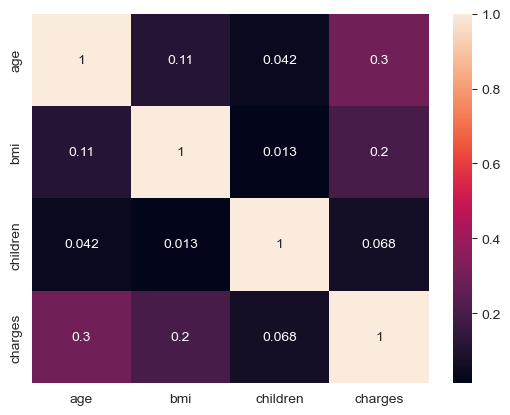

In [16]:
## Let's check the correlation with the charges
corr = data.drop('region', axis=1).corr()
sns.heatmap(corr, annot=True)

No category is related too much on price. Pretty sorted dataset

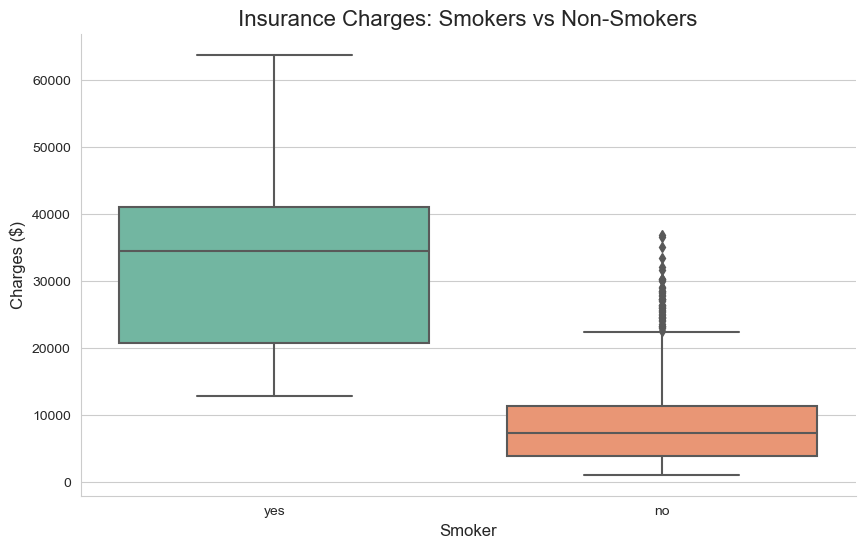

In [17]:
## Let's see for the smokers...if charges are more for them
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='smoker', y='charges', palette="Set2")
plt.title("Insurance Charges: Smokers vs Non-Smokers", fontsize=16)
plt.xlabel("Smoker", fontsize=12)
plt.ylabel("Charges ($)", fontsize=12)
sns.despine()
plt.show()

We can see charges are on more for smokers

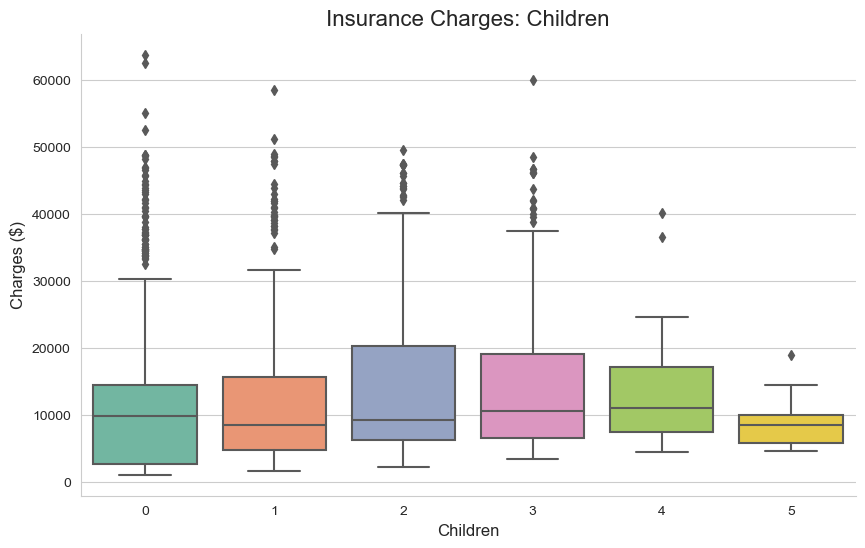

In [18]:
## How kids affect
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='children', y='charges', palette="Set2")
plt.title("Insurance Charges: Children", fontsize=16)
plt.xlabel("Children", fontsize=12)
plt.ylabel("Charges ($)", fontsize=12)
sns.despine()
plt.show()

Ones with 0 children are at same level in charges as compared to one with multiple. It might mean that for the ones with 0 children, they might be the youngsters, 20 yrs and smoking is what increases the prices. let's see

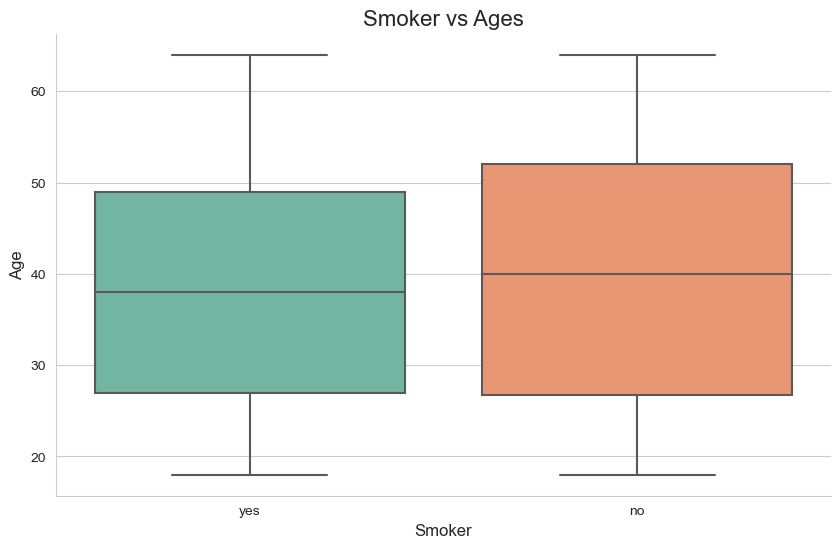

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='smoker', y='age', palette="Set2")
plt.title("Smoker vs Ages", fontsize=16)
plt.xlabel("Smoker", fontsize=12)
plt.ylabel("Age", fontsize=12)
sns.despine()
plt.show()

Damn! No the smoker median age is near 40. and for ages, mean was nearly equal to median. Hence that assumption of ours was wrong

## **DATA PREPROCESSING**

In [20]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
'''
We need to encode the sex value. 
As we only have binary categories, label encoding will suffice
We need not do one hot encoding here
'''
data['sex'].replace({'female':0,
                      'male': 1}, inplace=True)
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,yes,southwest,16884.9240
1,18,1,33.77,1,no,southeast,1725.5523
2,28,1,33.00,3,no,southeast,4449.4620


In [22]:
## Same for smoker - 
data['smoker'].replace({'no':0,
                       'yes':1}, inplace=True)
data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,southwest,16884.9240
1,18,1,33.77,1,0,southeast,1725.5523


In [23]:
'''
For Region - 
Option A: One-Hot Encoding (Recommended)
What it does: Creates 4 binary columns (e.g., region_southeast, region_northwest), where only one is 1 per row.
Why?
Perfect for nominal data—no false ordinal relationship.
Works reliably with all models (linear, tree-based, neural networks).
Interpretable: Each region gets its own "weight" in linear models.
Downside: Increases dimensionality (but with only 4 regions, this is negligible).
'''
data_encoded = pd.get_dummies(data, columns=["region"], drop_first=True)
data = data_encoded

In [24]:
data

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


Now our preprocessing is done. It's time to do modelling

## **BASELINE MODELLING EXPERIMENT**

In [25]:
from sklearn.model_selection import train_test_split
X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set sizes:")
print(f"X_train: {X_train.shape}") 
print(f"y_train: {y_train.shape}") 
print("\nTest set sizes:")
print(f"X_test: {X_test.shape}")   
print(f"y_test: {y_test.shape}")  

Training set sizes:
X_train: (1070, 8)
y_train: (1070,)

Test set sizes:
X_test: (268, 8)
y_test: (268,)


We are not using validation as 
* we will only use plain Linear Regression here. No hyperparameter tuning
* small dataset

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# fitting the data
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Get feature names and coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})
print(f"Intercept: {model.intercept_:.2f}")
print(coefficients)

Intercept: -11931.22
            Feature   Coefficient
0               age    256.975706
1               sex    -18.591692
2               bmi    337.092552
3          children    425.278784
4            smoker  23651.128856
5  region_northwest   -370.677326
6  region_southeast   -657.864297
7  region_southwest   -809.799354


### **Linear Regression Coefficients Interpretation**

| Feature          | Coefficient | Interpretation                                                                 | Action                                                                 |
|------------------|-------------|--------------------------------------------------------------------------------|------------------------------------------------------------------------|
| **Intercept**    | -11,931.22  | Theoretical baseline (ignore literal value; focus on feature impacts).          | None needed.                                                          |
| `age`            | +256.98     | Each additional year adds ~$257 to charges (reasonable for aging-related costs). | Valid—keep.                                                           |
| `bmi`            | +337.09     | Higher BMI increases charges (consistent with medical risks).                   | Valid—keep.                                                           |
| `smoker`         | +23,651.13  | Smokers pay ~$23,651 more—**dominant driver** of charges.                      | Valid—highlight in conclusions.                                       |
| `children`       | +425.28     | Each child adds ~$425 (may reflect family plans).                              | Valid—keep.                                                           |
| `sex`            | -18.59      | Tiny effect—likely **not significant**.                                        | **Check p-value**; drop if >0.05.                                     |
| `region_northwest` | -370.68    | Slightly cheaper than reference region.                                        | **Verify statistical significance** (p-value).                         |
| `region_southeast` | -657.86    | Slightly cheaper than reference region.                                        | Magnitudes are small—consider grouping regions if insignificant.       |
| `region_southwest` | -809.80    | Slightly cheaper than reference region.                                        | Check for **multicollinearity** (VIF).                                |

---


In [28]:
## Making the predictions
# Predict on training and test sets
y_test_pred = model.predict(X_test)  
y_test_pred[:5]

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656])

In [29]:
## Let's compare with metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate metrics for the test set
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_test_pred)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 4181.19
MSE: 33596915.85
RMSE: 5796.28
R² Score: 0.7836


**R-Squared -** R-squared is a statistical measure that represents the goodness of fit of a regression model. The value of R-square lies between 0 to 1. Where we get R-square equals 1 when the model perfectly fits the data and there is no difference between the predicted value and actual value.  However, we get R-square equals 0 when the model does not predict any variability in the model and it does not learn any relationship between the dependent and independent variables.

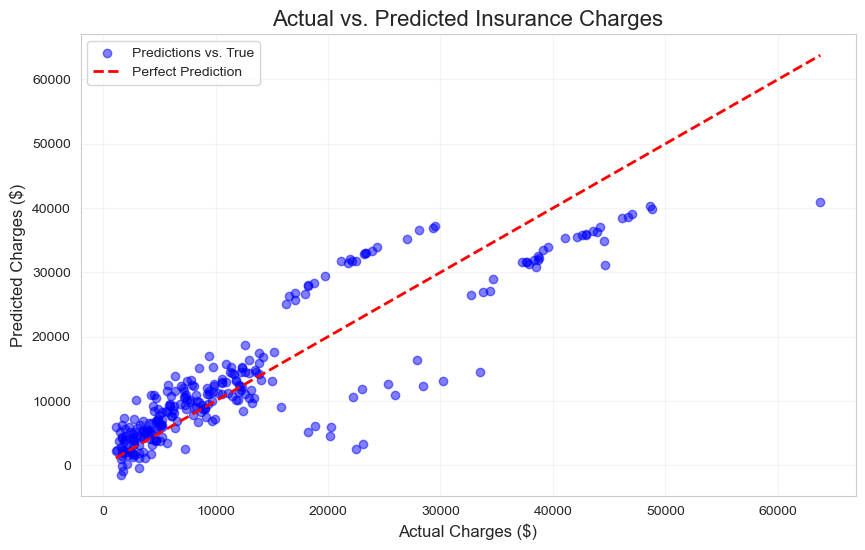

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue', label='Predictions vs. True')

# Plot the perfect prediction line (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         '--r', linewidth=2, label='Perfect Prediction')

plt.title('Actual vs. Predicted Insurance Charges', fontsize=16)
plt.xlabel('Actual Charges ($)', fontsize=12)
plt.ylabel('Predicted Charges ($)', fontsize=12)
plt.legend()
plt.grid(alpha=0.2)
plt.show()

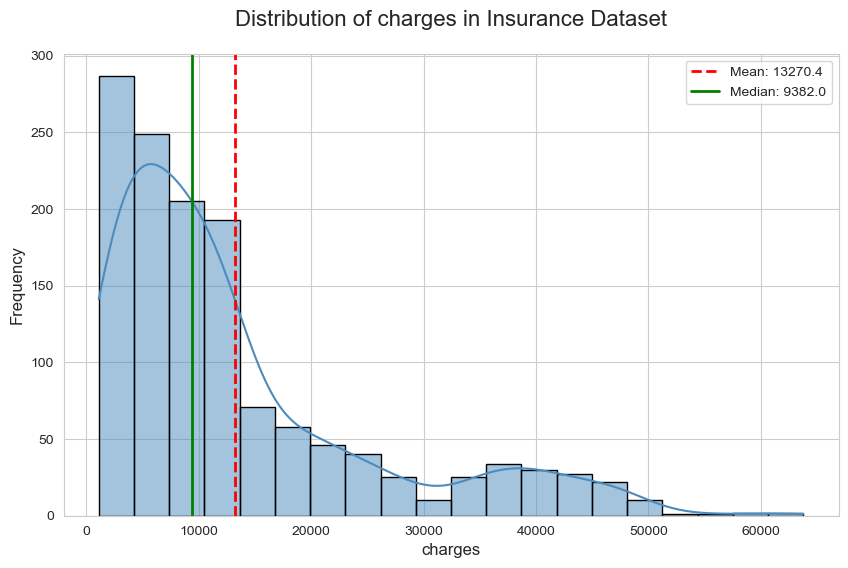

In [75]:
## Our results are not too good to be honest
# was it because of price outliers and so... let's see
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="charges", bins=20, kde=True, color="#4B8BBE", edgecolor="black")
plt.title("Distribution of charges in Insurance Dataset", fontsize=16, pad=20)
plt.xlabel("charges", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

mean_age = np.mean(data['charges'])
median_age = np.median(data['charges'])
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {mean_age:.1f}')
plt.axvline(median_age, color='green', linestyle='-', linewidth=2, 
            label=f'Median: {median_age:.1f}')
plt.legend()

In [76]:
'''
So yeah its not too good
'''

'\nSo yeah its not too good\n'

## **CENTRALIZING THE DATA AND NEW MODELLING**

In [62]:
data['log_charges'] = np.log1p(data['charges'])
data.head(3)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,log_charges
0,19,0,27.90,0,1,16884.9240,0,0,1,9.734236
1,18,1,33.77,1,0,1725.5523,0,1,0,7.453882
2,28,1,33.00,3,0,4449.4620,0,1,0,8.400763


In [63]:
from sklearn.model_selection import train_test_split
X2 = data.drop(['charges', 'log_charges'], axis=1)
y2 = data['log_charges']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set sizes:")
print(f"X_train: {X_train2.shape}") 
print(f"y_train: {y_train2.shape}") 
print("\nTest set sizes:")
print(f"X_test: {X_test2.shape}")   
print(f"y_test: {y_test2.shape}")  

Training set sizes:
X_train: (1070, 8)
y_train: (1070,)

Test set sizes:
X_test: (268, 8)
y_test: (268,)


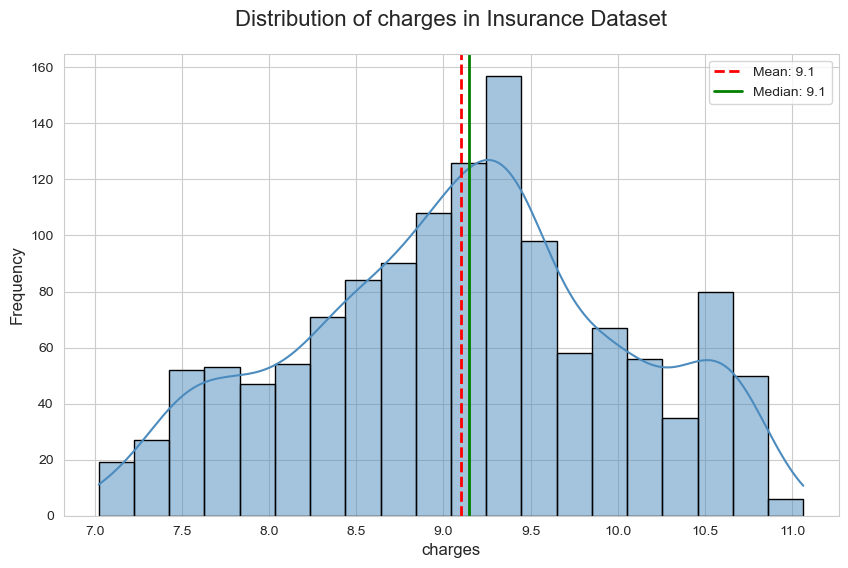

In [64]:
## Our results are not too good to be honest
# was it because of price outliers and so... let's see
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="log_charges", bins=20, kde=True, color="#4B8BBE", edgecolor="black")
plt.title("Distribution of charges in Insurance Dataset", fontsize=16, pad=20)
plt.xlabel("charges", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

mean_age = np.mean(data['log_charges'])
median_age = np.median(data['log_charges'])
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {mean_age:.1f}')
plt.axvline(median_age, color='green', linestyle='-', linewidth=2, 
            label=f'Median: {median_age:.1f}')
plt.legend()

In [65]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

LinearRegression()

In [66]:
coefficients = pd.DataFrame({
    'Feature': X_train2.columns,
    'Coefficient': model2.coef_
})
print(f"Intercept: {model2.intercept_:.2f}")
print(coefficients)

Intercept: 7.05
            Feature  Coefficient
0               age     0.034238
1               sex    -0.074321
2               bmi     0.013599
3          children     0.092419
4            smoker     1.551519
5  region_northwest    -0.056402
6  region_southeast    -0.136027
7  region_southwest    -0.122527


In [67]:
## Making the predictions
# Predict on training and test sets
y_test_pred2 = model2.predict(X_test2)  
y_test_pred2[:5]

array([ 9.11470731,  8.6312095 , 11.09876796,  9.11839303,  9.55219508])

In [68]:
y_test_pred2_dec = np.expm1(y_test_pred2)
y_test_pred2_dec[:10]

array([ 9086.97428249,  5602.85203142, 66088.68459689,  9120.53183141,
       14074.55781985,  5941.36266338,  2826.35761405, 15104.11550605,
        3790.77494406, 10520.30011917])

In [72]:
y_test2 = np.expm1(y_test2)

In [73]:
## Let's compare with metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate metrics for the test set
mae = mean_absolute_error(y_test2, y_test_pred2_dec)
mse = mean_squared_error(y_test2, y_test_pred2_dec)
rmse = mean_squared_error(y_test2, y_test_pred2_dec, squared=False)  # RMSE
r2 = r2_score(y_test2, y_test_pred2_dec)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 3888.44
MSE: 61059596.60
RMSE: 7814.06
R² Score: 0.6067


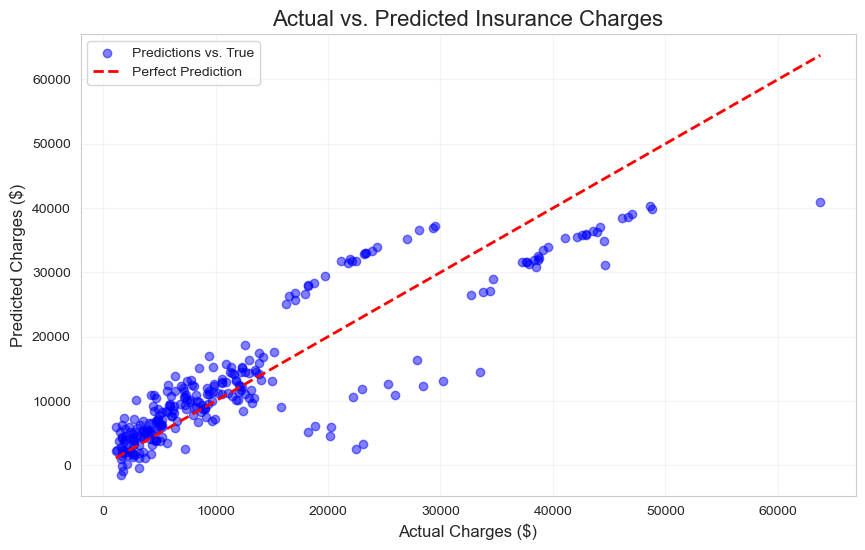

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test2, y_test_pred, alpha=0.5, color='blue', label='Predictions vs. True')

# Plot the perfect prediction line (y=x)
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 
         '--r', linewidth=2, label='Perfect Prediction')

plt.title('Actual vs. Predicted Insurance Charges', fontsize=16)
plt.xlabel('Actual Charges ($)', fontsize=12)
plt.ylabel('Predicted Charges ($)', fontsize=12)
plt.legend()
plt.grid(alpha=0.2)
plt.show()

## **MAKING THE INTERFACE**

In [79]:
pd.read_csv('insurance.csv').head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [80]:
import numpy as np

def predict_insurance_charge(model):
    print("\n" + "="*40)
    print("INSURANCE CHARGE PREDICTOR")
    print("="*40)
    
    # Collect user inputs
    print("\nEnter customer details:")
    age = int(input("Age (18-70): "))
    sex = input("Sex (male/female): ").lower()
    bmi = float(input("BMI (15-50): "))
    children = int(input("Number of children (0-5): "))
    smoker = input("Smoker? (yes/no): ").lower()
    region = input("Region (northwest/southeast/southwest): ").lower()
    
    # Encode inputs (match your training data encoding)
    sex_encoded = 1 if sex == 'male' else 0
    smoker_encoded = 1 if smoker == 'yes' else 0
    
    # One-hot encode region (assuming 3 regions from your columns)
    region_nw = 1 if region == 'northwest' else 0
    region_se = 1 if region == 'southeast' else 0
    region_sw = 1 if region == 'southwest' else 0
    
    # Create input array in EXACT SAME ORDER as model training
    input_data = np.array([[
        age,
        sex_encoded,
        bmi,
        children,
        smoker_encoded,
        region_nw,
        region_se,
        region_sw
    ]])
    
    # Make prediction using your pre-trained model
    predicted_charge = np.expm1(model.predict(input_data)[0])
    
    print(f"\nPredicted Insurance Charge: ${predicted_charge:,.2f}")

# How to use:
# 1. First train your model (as you did earlier)
# 2. Then call this function with your model:
predict_insurance_charge(model2)



INSURANCE CHARGE PREDICTOR

Enter customer details:
Age (18-70): 18
Sex (male/female): male
BMI (15-50): 33.770
Number of children (0-5): 0
Smoker? (yes/no): no
Region (northwest/southeast/southwest): southeast

Predicted Insurance Charge: $2,728.76


C:\Users\PROGRAMMER\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [79]:
data.tail(1)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,log_charges
1337,61,0,29.07,0,1,29141.3603,1,0,0,10.279948
